# Looping

### Aufgestellung

Ein Körper der Masse $m = 20~g$ soll, nachdem dieser von einer Feder mit der Federkonstante $k = 4,8~\frac{N}{cm}$ abgeschossen wurde, eine Schleifenbahn vom Radius $r = 0,5~m$ reibungsfrei durchlaufen. Um welches Stück $x_0$ muss man die Feder spannen, damit der Körper die Schleifenbahn gerade noch durchläuft, ohne herunter zu fallen?


### Gegeben
- Masse des Körpers $m = 20~g$
- Federkonstante der Feder $k = 4,8~\frac{N}{cm}$
- Radius der Schleifenbahn $r = 0,5~m$

### Gesucht
- Federspannstrecke $x_0$

### Skizze
![title](Skizzen/Skizze_Looping.png)

### Physikalischer Lösungsweg
Nun ist es möglich die Aufgabe mittels der Formel zur Berechnung der Federspannstrecke $x_0$ zu lösen. Die Federspannstrecke gibt an, wie weit die Masse $m$ von ihrem Ruhepunkt gespannt wird. 

$x_0 = \sqrt(\frac{5 \cdot m \cdot g \cdot r}{k})$

Nun müssen wir die oben gegebenen Werte nur noch in die Formel einsetzen. Desweiteren benötigen wir für für diese Aufgabe die Fallbeschleunigung $g$. 

$x_0 = \sqrt(\frac{5 \cdot 0,02\,kg \cdot 9,81\,\frac{m}{s^2} \cdot 0,5\,m}{480\,\frac{N}{m}}) = \sqrt(\frac{0,492\,N}{480 \,\frac{N}{m}}) = \sqrt(0,001) = 0,032~m = 3,2~cm$


### Implementierung in Python
Als Erstes müssen die verwendeten Bibliotheken importiert werden.

In [1]:
# Importieren der benötigten Bibliotheken
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd

Anschließend können die gegebenen Werte in Variablen definiert werden. Somit kann $x_0$ direkt berechnet und in einer Variablen gespeichert werden. Auch kann ebenso eine Funktion erstellt werden, auf welche man zu einem späteren Zeitpunkt zurückgreifen kann.

In [2]:
# Variablen definieren
m = 0.02 # Masse m [kg]
k = 480 # Federkonstante k [N/m]
r = 0.5 # Radius r [m]
g = 9.81 # Fallbeschleunigung [m/s^2]

FG = m * g # Gewichtskraft

# Formel für x0
x0 = math.sqrt((5*FG*r)/(k))
# Ausgabe des Ergebnisses
print(round(x0*100, 2), "cm") # round


def berechne_x0(FG, r, k):
    x0 = math.sqrt((5*FG*r)/(k))
    return x0

3.2 cm


Folgender Code-Block erzeugt dasselbe Ergebnis mittels einer while-Schleife. Solange $E_{pot} \leq E_{pot,kin}$ spannt die Funktion die Feder virtuell weiter. 

In [3]:
E_pot_Feder =  0
E_pot_kin_looping = 1
x0 = 0

while E_pot_Feder <= E_pot_kin_looping:

    x0 = x0 + 0.001
    E_pot_Feder =  (k/2)*(x0**2)
    E_pot_kin_looping = FG *2*r + ((m/2) * g * r)
    

# Ausgabe des Ergebnisses
print(round(x0*100, 2),"cm")

3.2 cm


### Graphische Darstellung der physikalischen Lösung
Um den Looping durchlaufen zu können, muss die Zentrifugalkraft größer sein als die Gewichtskraft. Beim Spannen der Feder können wir für jeden Schritt die Zentripedalkraft am Scheitelpunkt ausrechnen und in einem Plot auftragen. Wenn wir die Gewichtskraft zusätzlich in das Diagramm auftragen, zeigt der Schnittpunkt den Weg, den die Feder gespannt werden muss.
Man kann also das Spannen der Feder simulieren und berechnen, ab welcher Länge die Gesamtenergie am Scheitelpunkt größer oder gleich der kinetischen Energie an der gespannten Feder wird.
Hierfür wird in einem ersten Schritt ein $x_0$-Vektor erstellt:

In [4]:
# Erstellen des x0-Vektors
x0_vector = np.arange(0,0.051,0.001)

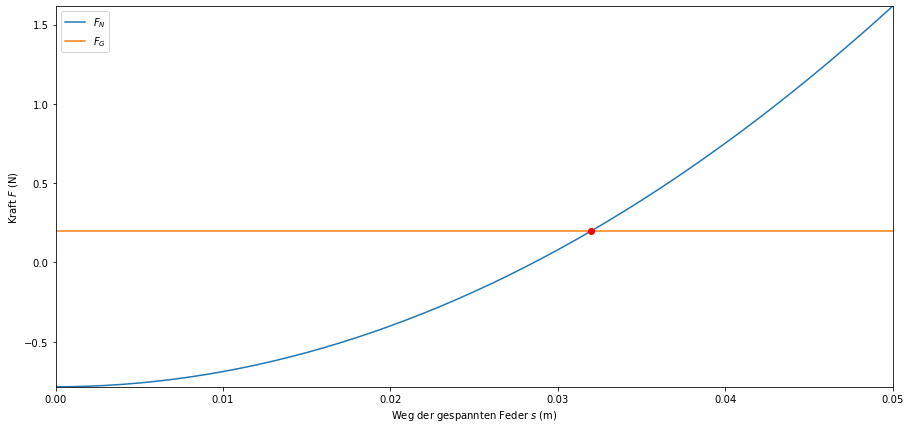

In [5]:
vector1 = []
vector2 = []

for s in x0_vector:
    E_pot_Feder =  (k/2)*(s**2)
    vector1.append(-4 * FG + ((k * s**2) / r))
    vector2.append(FG)

# Erstellen von Vektoren
v1 = np.array(vector1)
v2 = np.array(vector2)
x  = np.array(x0_vector)

# Visualisierung
# Definieren der Größe und des Aussehens des Plots
fig, axs = plt.subplots(1, 1, figsize=(15, 7), sharey=False)
axs.plot(x, v1, label='$F_N$')
axs.plot(x, v2, label='$F_G$')
# Achsenbeschriftungen hinzufügen
axs.set_xlabel("Weg der gespannten Feder $\mathit{s}$ (m)")
axs.set_ylabel("Kraft $\mathit{F}$ (N)")
# Achsenlegende
axs.legend()
# Schnittpunkt visualisieren 
idx = np.argwhere(np.diff(np.sign(v2 - v1))).flatten()
axs.plot(x[idx+1], v2[idx+1], 'ro')
plt.margins(0,0)
plt.show()

### Graphische Darstellung unter Variation der Anfangsbedingung
Der Vorteil einer Programmiersprache wie Python ist es, dass wir nun die gegebenen Werte verändern können. So können zum Beispiel verschiedene Federkonstanten angegeben werden. Dazu wird in einem ersten Schritt ein Vektor erstellt, der verschiedene Werte für die Federkonstante enthält. 

In [6]:
# Erstellen eines k-Vektors
k_vector = np.arange(100, 800, 40)
print(k_vector)

[100 140 180 220 260 300 340 380 420 460 500 540 580 620 660 700 740 780]


In [7]:
# Erstellen einer leeren Werte-Liste
werte = []

# Iteration über k-Vektor und Berechnung vpn x0 für verschiedene k
for k in k_vector:
    x0 = berechne_x0(FG, r, k)
    werte.append([k, x0])

tabelle = pd.DataFrame(werte, columns=['k', 'x0'])
tabelle.head()

,k,x0
0,100,0.070036
1,140,0.059191
2,180,0.052202
3,220,0.047218
4,260,0.043434


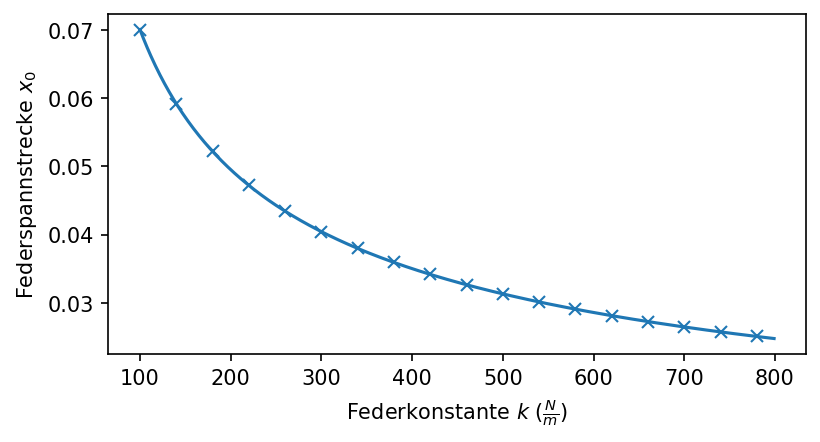

In [8]:
def f(k):
    return ((5*0.02*9.81*0.5)/(k))**0.5

# Definieren der Größe und des Aussehens des Plots
plt.figure(num=None, figsize=(6, 3), dpi=150, facecolor='w', edgecolor='k')


# Auftragen der Scheibendicken gegen die Außentemperatur 
plt.plot(np.arange(100, 800, 1).reshape(-1,1),f(np.arange(100, 800, 1).reshape(-1,1)),"-")
plt.plot(tabelle['k'], tabelle['x0'], 'x', c='#1f77b4')
plt.margins(0.05,0.05)
#plt.plot(tabelle['k'], tabelle['x0'], 'b-')
# Achsenbeschriftungen hinzufügen
plt.xlabel(r"Federkonstante $\mathit{k}$ ($\frac{N}{m}$)")
plt.ylabel(r"Federspannstrecke $\mathit{x_0}$")
plt.show()